In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# 복습

In [2]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


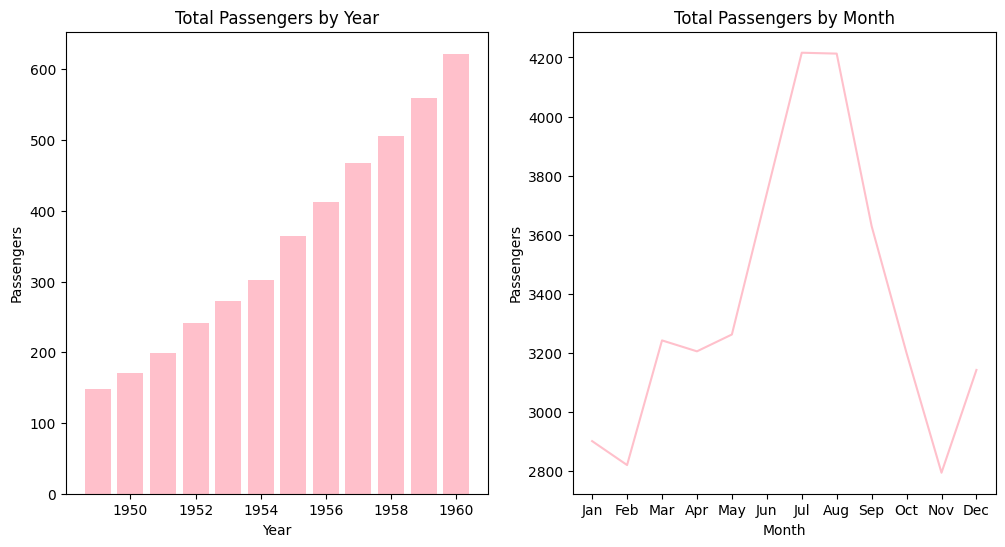

In [34]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('Total Passengers by Year')
ax2.set_title('Total Passengers by Month')
ax1.set_xlabel('Year')
ax2.set_xlabel('Month')
ax1.set_ylabel('Passengers')
ax2.set_ylabel('Passengers')

grouped = flights.groupby('month')['passengers'].sum()

ax1.bar(x=flights['year'], height=flights['passengers'], color='pink')
ax2.plot(grouped.index, grouped, color='pink')

plt.show()

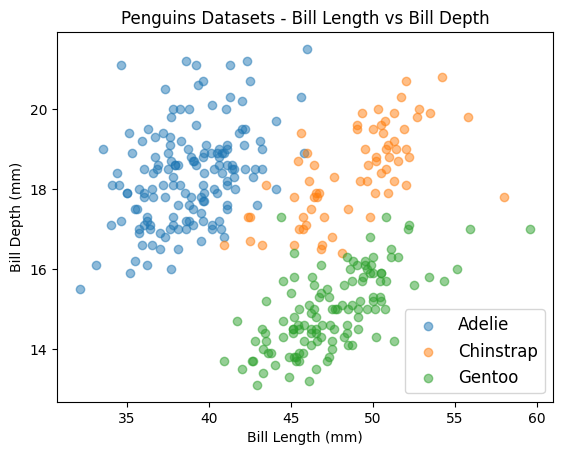

In [38]:
penguins = sns.load_dataset('penguins')

fig = plt.figure()
ax = fig.add_subplot(111)

species = penguins['species'].unique()

for s in species:
    x = penguins.loc[penguins['species']==s, 'bill_length_mm']
    y = penguins.loc[penguins['species']==s, 'bill_depth_mm']
    ax.scatter(x, y, alpha=0.5, label=s)

ax.set_title('Penguins Datasets - Bill Length vs Bill Depth')
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')

ax.legend(loc='lower right', fontsize=12)
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [3]:
plt.rc('font', family='Malgun Gothic')

In [4]:
x = [1,2]
y1, y2, y3 = [[1,2], [2,4], [3, 6]]

# 이해 필요!

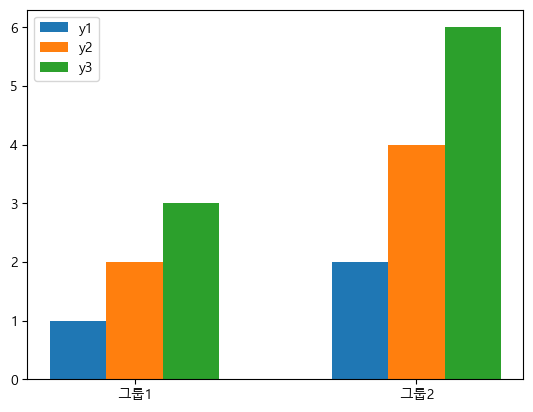

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2

ax.bar(x, y1, width=w,label='y1')
ax.bar(np.array(x)+w, y2, width=w, label='y2')
ax.bar(np.array(x)+w*2, y3, width=w, label='y3')

group_positions = np.array(x) + w
ax.set_xticks(group_positions)

labels = ['그룹1', '그룹2']
ax.set_xticklabels(labels)

plt.legend()
plt.show()

In [6]:
digits = load_digits()
data = digits.data / 16.0 # 정규화

c:\Users\PC\Bcode\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


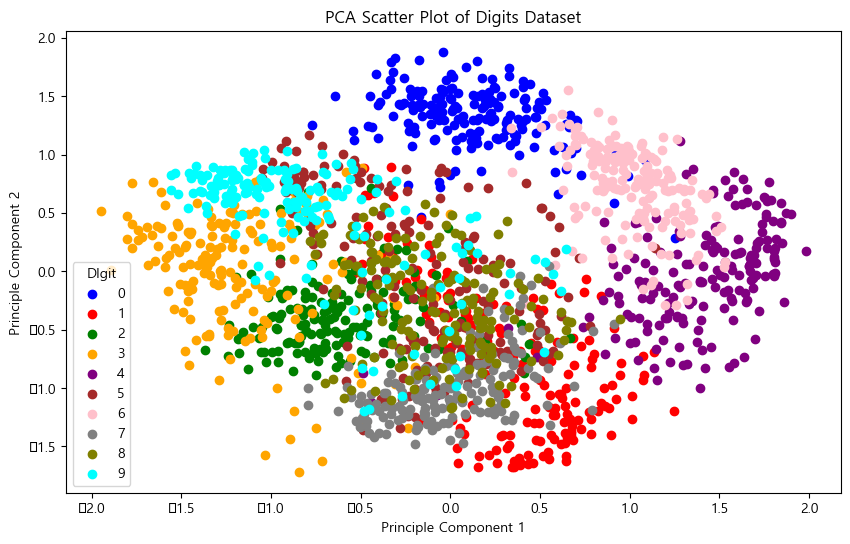

In [7]:
pca = PCA(n_components=2)  # 특징 2개
reduced = pca.fit_transform(data)  # 데이터를 넣어 2차원으로

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(10):
    ax.scatter(reduced[digits.target == i, 0], 
               reduced[digits.target == i, 1],
               color=colors[i],
               label=str(i))
    
ax.set_title('PCA Scatter Plot of Digits Dataset')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')


plt.legend(title='DIgit')
plt.show()

# seaborn / plotly 줌인아웃가능

C:\Users\PC\AppData\Local\Temp\ipykernel_3576\3653154852.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='age', data=titanic, palette='Paired', )


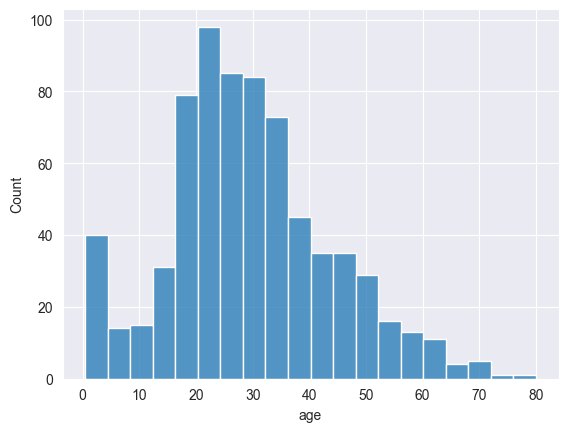

In [13]:
sns.set_style('darkgrid')

titanic = sns.load_dataset('titanic')

sns.histplot(x='age', data=titanic, palette='Paired', )
plt.show()

# 오후

# seaborn scatter

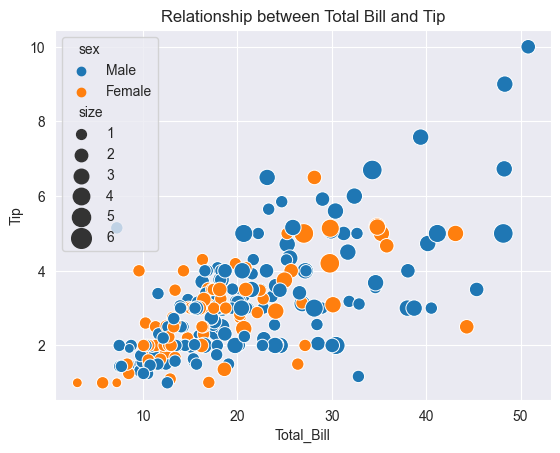

In [21]:
tips = sns.load_dataset('tips')

sns.scatterplot(x='total_bill', y='tip', data=tips, 
                hue='sex', size='size', sizes=(50,200)) # 'size'는 인원수

plt.xlabel('Total_Bill')
plt.ylabel('Tip')
plt.title('Relationship between Total Bill and Tip')

plt.show()

# lineplot()

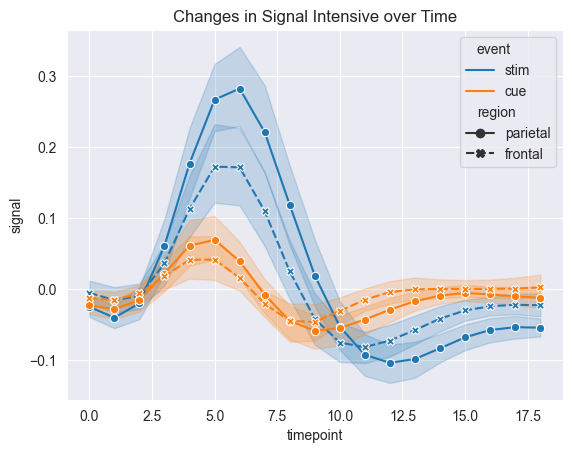

In [30]:
fmri = sns.load_dataset('fmri')

sns.lineplot(x='timepoint', y='signal', data=fmri,
             hue='event', style='region', markers=True)

plt.title('Changes in Signal Intensive over Time')

plt.show()

# barplot()

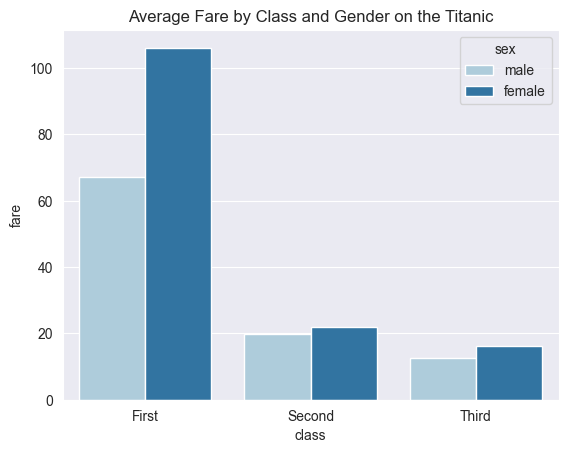

In [41]:
titanic = sns.load_dataset('titanic')

sns.barplot(x='class', y='fare', data=titanic, errorbar=None,
            hue='sex', palette='Paired')

plt.title('Average Fare by Class and Gender on the Titanic')

plt.show()

# histplot()

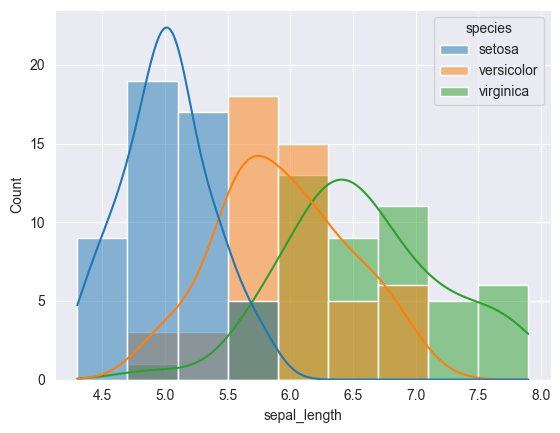

In [48]:
iris = sns.load_dataset('iris')

sns.histplot(iris, x='sepal_length', hue='species', kde=True)

plt.show()

# kdeplot()

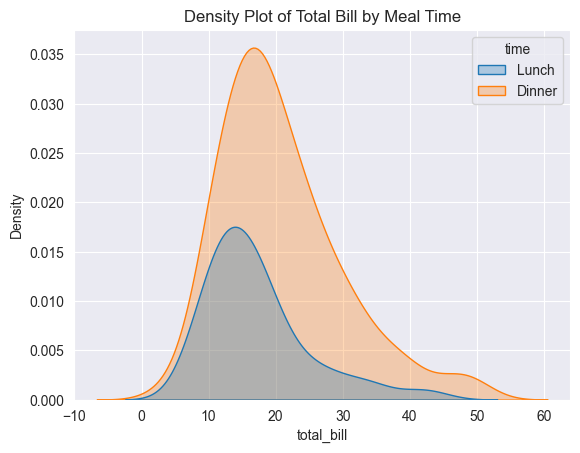

In [60]:
tips = sns.load_dataset('tips')

sns.kdeplot(x='total_bill', data=tips, hue='time', fill=True, alpha=0.3)

plt.title('Density Plot of Total Bill by Meal Time')

plt.show()

# boxplot()

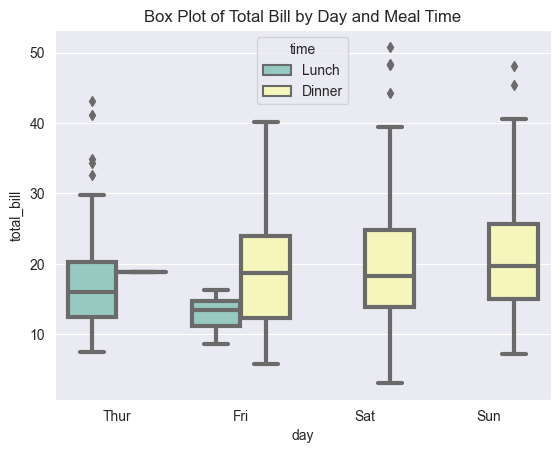

In [66]:
sns.boxplot(tips, x='day', y='total_bill', hue='time', 
            palette='Set3', linewidth=3)

plt.title('Box Plot of Total Bill by Day and Meal Time')

plt.show()

# heatmap()  / 피벗으로 설정한 뒤에

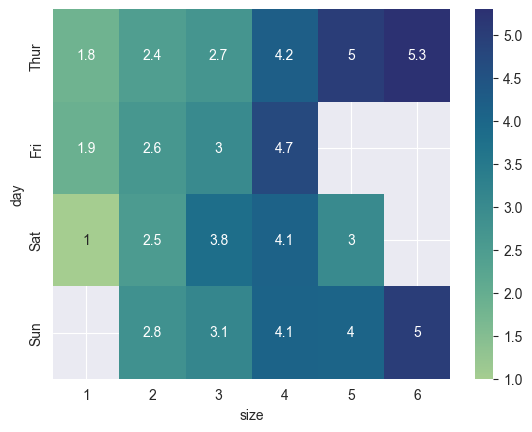

In [69]:
pivot = tips.pivot_table(index='day', columns='size', values='tip')

sns.heatmap(pivot, cmap='crest', annot=True)


plt.show()

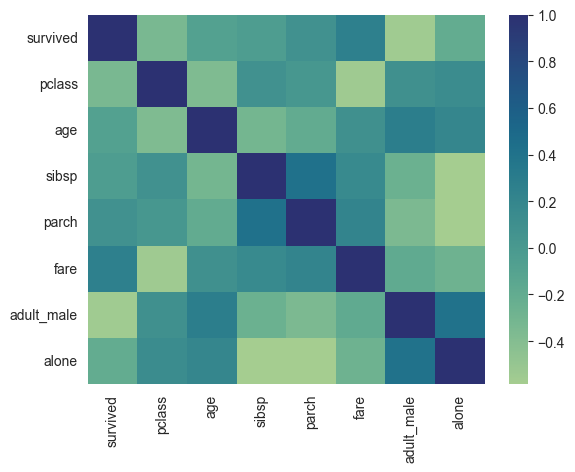

In [76]:
titanic.corr(numeric_only=True)

sns.heatmap(titanic.corr(numeric_only=True), cmap='crest')

plt.show()

# jointplot()  / 맷플롯립에 없는 기능
* 산점도와 히스토그램을 결합한 plot

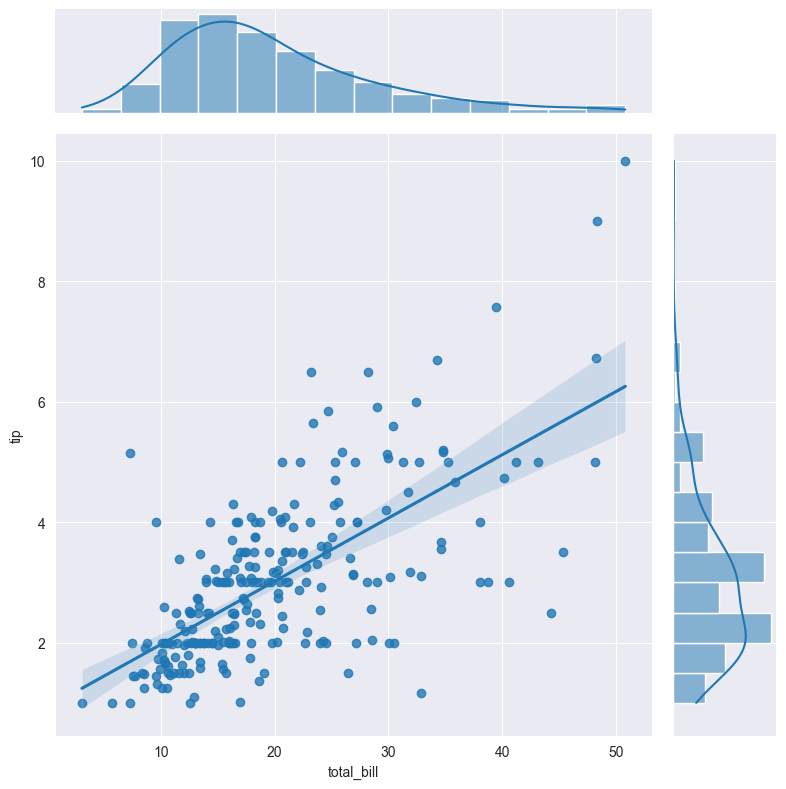

In [85]:
sns.jointplot(tips, x='total_bill', y='tip', height=8, kind='reg')
# sns.jointplot(tips, x='total_bill', y='tip', height=8, kind='hex')
# sns.jointplot(tips, x='total_bill', y='tip', height=8, kind='kde')

plt.show()

# facetgrid()

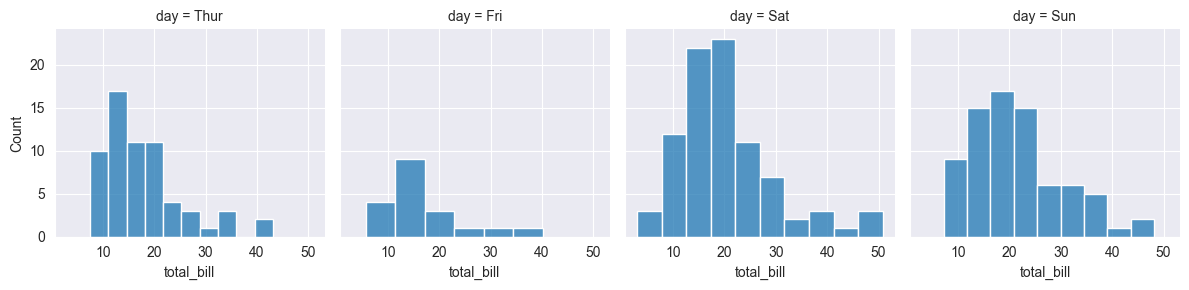

In [90]:
g = sns.FacetGrid(tips, col='day')

g.map(sns.histplot, 'total_bill')

plt.show()

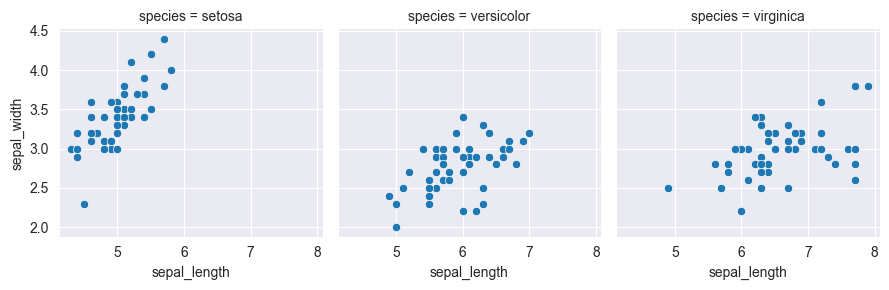

In [98]:
g = sns.FacetGrid(iris, col='species')

g.map(sns.scatterplot, 'sepal_length', 'sepal_width')

plt.show()

In [91]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
